Clean notebook for presentation.
Created by Chris Mulvey on 23 November 2020.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
full_2016 = pd.read_csv('../data/full_2016.csv')
full_2017 = pd.read_csv('../data/full_2017.csv')
full_2018 = pd.read_csv('../data/full_2018.csv')
full_2019 = pd.read_csv('../data/full_2019.csv')
half_2016 = pd.read_csv('../data/half_2016.csv')
half_2017 = pd.read_csv('../data/half_2017.csv')
half_2018 = pd.read_csv('../data/half_2018.csv')
half_2019 = pd.read_csv('../data/half_2019.csv')

In [3]:
full_2016.head()

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,02:25:42
1,2,3,Brian Shelton,02:34:43
2,3,1047,Christopher Capps,02:38:43
3,4,1052,Jason Grimes,02:45:06
4,5,1046,David Adams,02:47:28


In [4]:
full_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3842 entries, 0 to 3841
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Overall  3842 non-null   int64 
 1   Bib      3842 non-null   int64 
 2   Name     3842 non-null   object
 3   Time     3842 non-null   object
dtypes: int64(2), object(2)
memory usage: 120.2+ KB


Need to convert the Time column from an object to a time format to make it usable for comparison.

In [5]:
def convert_time(df, column):
    """Converts time column in dataframe from object to timedelta64[ns] to keep HH:MM:SS format 
    Input is DataFrame name, column name in str format"""
    df[column] = (pd.to_datetime(df[column], format = '%H:%M:%S') - 
                     pd.to_datetime(df[column], format = '%H:%M:%S').dt.normalize())
#.dt.normalize sets the time portion of the datetime to midnight. Subtracting the normalized datetime leaves only
# hours, minutes, and seconds.

In [6]:
convert_time(full_2016, 'Time')

In [7]:
full_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3842 entries, 0 to 3841
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype          
---  ------   --------------  -----          
 0   Overall  3842 non-null   int64          
 1   Bib      3842 non-null   int64          
 2   Name     3842 non-null   object         
 3   Time     3842 non-null   timedelta64[ns]
dtypes: int64(2), object(1), timedelta64[ns](1)
memory usage: 120.2+ KB


In [8]:
convert_time(full_2017, 'Time')
convert_time(full_2018, 'Time')
convert_time(full_2019, 'Time')
convert_time(half_2016, 'Time')
convert_time(half_2017, 'Time')
convert_time(half_2018, 'Time')
convert_time(half_2019, 'Time')

Adding a column to each DataFrame to capture year.

In [9]:
full_2016['Year'] = 2016
full_2017['Year'] = 2017
full_2018['Year'] = 2018
full_2019['Year'] = 2019

In [10]:
full_2016.head()

,Overall,Bib,Name,Time,Year
0,1,1,Scott Wietecha,02:25:42,2016
1,2,3,Brian Shelton,02:34:43,2016
2,3,1047,Christopher Capps,02:38:43,2016
3,4,1052,Jason Grimes,02:45:06,2016
4,5,1046,David Adams,02:47:28,2016


One thing I noticed is that there is a drastic difference in the number of registered runners between 2017 and 2018, with 2018 having 1,536 less runners in the full marathon. That's a 42% reduction in runners. 

In [11]:
full_2017.info()
full_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3651 entries, 0 to 3650
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype          
---  ------   --------------  -----          
 0   Overall  3651 non-null   int64          
 1   Bib      3651 non-null   int64          
 2   Name     3651 non-null   object         
 3   Time     3651 non-null   timedelta64[ns]
 4   Year     3651 non-null   int64          
dtypes: int64(3), object(1), timedelta64[ns](1)
memory usage: 142.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype          
---  ------   --------------  -----          
 0   Overall  2115 non-null   int64          
 1   Bib      2115 non-null   int64          
 2   Name     2115 non-null   object         
 3   Time     2115 non-null   timedelta64[ns]
 4   Year     2115 non-null   int64          
dtypes: int64(3), object(1), timedelta64[ns](1)
memory usage: 82.7+ KB


The 2018 half marathon had a significant drop in runners as well, with 7,352 less runners in 2018. That is a 32% decrease.

In [12]:
half_2017.info()
half_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22292 entries, 0 to 22291
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype          
---  ------   --------------  -----          
 0   Overall  22292 non-null  int64          
 1   Bib      22292 non-null  int64          
 2   Name     22292 non-null  object         
 3   Time     22292 non-null  timedelta64[ns]
dtypes: int64(2), object(1), timedelta64[ns](1)
memory usage: 696.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14940 entries, 0 to 14939
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype          
---  ------   --------------  -----          
 0   Overall  14940 non-null  int64          
 1   Bib      14940 non-null  int64          
 2   Name     14940 non-null  object         
 3   Time     14940 non-null  timedelta64[ns]
dtypes: int64(2), object(1), timedelta64[ns](1)
memory usage: 467.0+ KB


Removing runners who didn't finish (have Overall of 99999).

In [13]:
full_2016_clean = full_2016[full_2016['Overall'] < 99999]
full_2017_clean = full_2017[full_2017['Overall'] < 99999]
full_2018_clean = full_2018[full_2018['Overall'] < 99999]
full_2019_clean = full_2019[full_2019['Overall'] < 99999]

In [14]:
full_2016_clean

,Overall,Bib,Name,Time,Year
0,1,1,Scott Wietecha,02:25:42,2016
1,2,3,Brian Shelton,02:34:43,2016
2,3,1047,Christopher Capps,02:38:43,2016
3,4,1052,Jason Grimes,02:45:06,2016
4,5,1046,David Adams,02:47:28,2016
...,...,...,...,...,...
2947,2957,435,Jane Tao,06:51:54,2016
2948,2958,27210,Kate Mishkin,06:53:03,2016
2949,2959,27443,Gabrielle Castro,06:53:35,2016
2950,2960,13085,Valerie Bailey,06:53:58,2016


It's interesting that in 2016 there were almost 1,000 runners who did not finish the full marathon.

Concatening the cleaned-up full marathon DataFrames.

In [15]:
full = [full_2016_clean, full_2017_clean, full_2018_clean, full_2019_clean]
full_marathons = pd.concat(full, ignore_index = True)

In [16]:
full_marathons

,Overall,Bib,Name,Time,Year
0,1,1,Scott Wietecha,02:25:42,2016
1,2,3,Brian Shelton,02:34:43,2016
2,3,1047,Christopher Capps,02:38:43,2016
3,4,1052,Jason Grimes,02:45:06,2016
4,5,1046,David Adams,02:47:28,2016
...,...,...,...,...,...
9545,2021,32032,Casey Thomaston,06:29:57,2019
9546,2022,33147,Deanna Alexander,06:30:17,2019
9547,2023,32980,Daniel Albert,06:35:52,2019
9548,2024,30113,Jacqueline Spires,06:36:58,2019


Plotting a single marathon to show run time vs overall place.

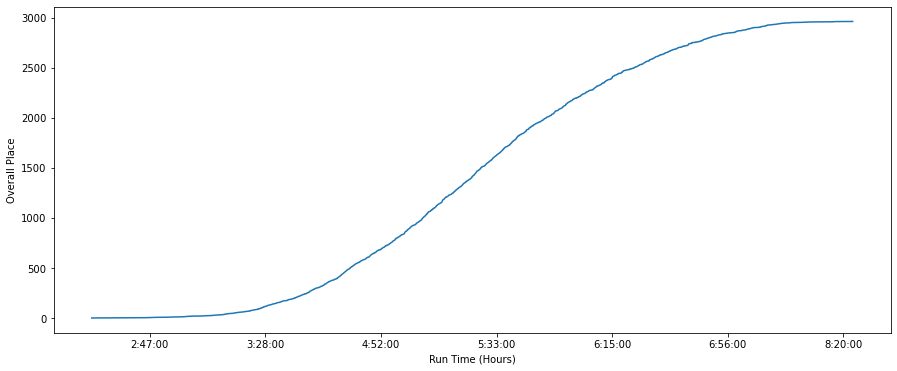

In [17]:
fig, ax = plt.subplots(figsize = (15,6))
ax.plot(full_2016_clean['Time'], full_2016_clean['Overall'])
ax.set_xlabel('Run Time (Hours)')
ax.set_ylabel('Overall Place')
ax.set_xticklabels(['0', '2:47:00', '3:28:00', '4:52:00', '5:33:00', '6:15:00', '6:56:00', '8:20:00']);

Plotting all full marathon data to show run time vs overall place.

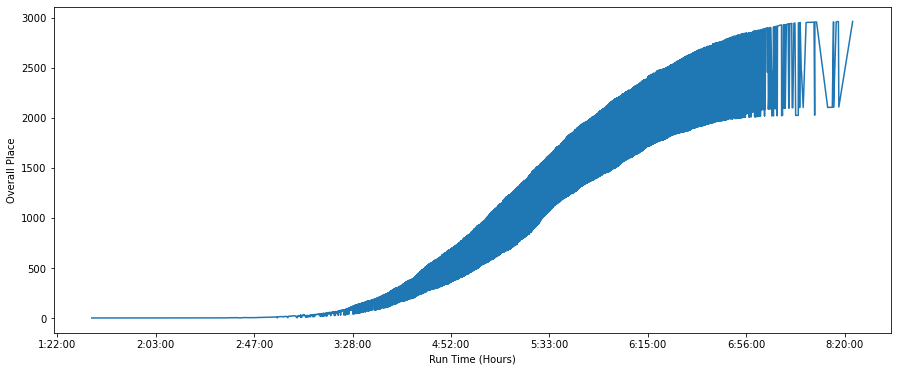

In [18]:
full_marathons_sorted = full_marathons.sort_values('Time') # sorting full_marathons by the Time column.
fig, ax = plt.subplots(figsize = (15,6))
ax.plot(full_marathons_sorted['Time'], full_marathons_sorted['Overall'])
ax.set_xlabel('Run Time (Hours)')
ax.set_ylabel('Overall Place')
ax.set_xticklabels(
    ['0', '1:22:00', '2:03:00', '2:47:00', '3:28:00', '4:52:00', '5:33:00', '6:15:00', '6:56:00', '8:20:00']
); # had to relabel the xticks to convert from the original nanoseconds in scientific notation.

Changing plot to scatter plot to show times by year as well.

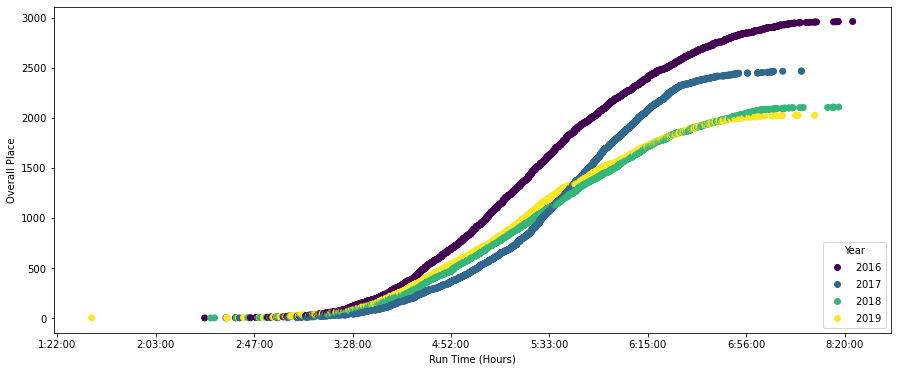

In [19]:
fig, ax = plt.subplots(figsize = (15,6))
scatter = ax.scatter(full_marathons_sorted['Time']/ np.timedelta64(1,'s'), full_marathons_sorted['Overall'],
          c = full_marathons_sorted['Year'])
ax.set_xlabel('Run Time (Hours)')
ax.set_ylabel('Overall Place')
legend = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Year")
ax.set_xticklabels(
    ['0', '1:22:00', '2:03:00', '2:47:00', '3:28:00', '4:52:00', '5:33:00', '6:15:00', '6:56:00', '8:20:00']);

The Rock 'n' Roll Marathon has a course time limit of 6 hours. The timer for the course time does not start until the last runner crosses the start line. The runners who finished after the 6 hour time limit started earlier in the start waves.